# Imports
Numpy import for array processing, python doesn’t have built in array support. The feature of working with native arrays can be used in python with the help of numpy library.

Pandas is a library of python used for working with tables, on importing the data, mostly data will be of table format, for ease manipulation of tables pandas library is imported

Matplotlib is a library of python used to plot graphs, for the purpose of visualizing the results we would be plotting the results with the help of matplotlib library.

Tensorflow import since we are going to use tensorflow framework for building model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Reading the dataset from data
In this line of code using the read_excel method of pandas library, the dataset has been imported from data folder and stored in dataset variable.

On visualizing the dataset, it contains of two columns X and Y where X is dependent variable and Y is Independent Variable.

>Note : On using Grey Kangaroos dataset,the data is normalised, standardised,having a lot of inbuilt variance and outliers the code would result in a gradient exploding problem. 

In [2]:
dataset = pd.read_csv(r'..\\data\\auto_insurance.csv')

On viewing the dataset, it contains of two columns X and Y where X is dependent variable and Y is Independent Variable.

In [3]:
dataset.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


# Creating Dependent and Independent variables
The X Column from the dataset is extracted into an X variable of type numpy, similarly the y variable
X is an independent variable 
Y is dependent variable Inference

In [4]:
X = dataset['X'].values
y = dataset['Y'].values

On execution of first line would result in a pandas Series Object
On using values attribute it would result in an numpy array

In [5]:
print(type(dataset['X']))
print(type(dataset['X'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


# Visualizing the data 
The step is to just see how the dataset is 
On visualization the data would appear something like this
The X and Y attributes would vary based on dataset.

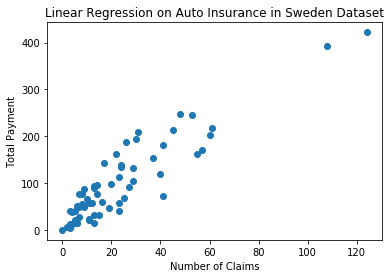

In [6]:
title='Linear Regression on Auto Insurance in Sweden Dataset'
x_axis_label = 'Number of Claims'
y_axis_label = 'Total Payment'
plt.scatter(X,y)
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

# Splitting the data into training set and test set
We are splitting the whole dataset into training and test set where training set is used for fitting the line to data and test set is used to check how good the line if for the data.

In [7]:
X_train,X_test = np.split(X,indices_or_sections = [int(len(X)*0.2)])
y_train,y_test = np.split(y,indices_or_sections = [int(len(X)*0.2)])

# Reshaping the numpy arrays since the tensorflow model expects 2-D array in further code
In further the tensorflow learning model would be expecting a 2-D array of shape (length,1).

In [8]:
X_train = np.reshape(X_train,newshape = (-1,1)).astype('float32')
y_train = np.reshape(y_train,newshape = (-1,1)).astype('float32')
X_test = np.reshape(X_test,newshape = (-1,1)).astype('float32')
y_test = np.reshape(y_test,newshape = (-1,1)).astype('float32')

# Variables for training 
* `Epochs`: stands for how many time the whole data is put through on forward propagation and one backward propagation.
* `Learning Rate` : is a hyperparameter in backpropagation algorithm to adjust the variables in graph based on loss obtained in forward propagation

In [9]:
epochs = 1000
learning_rate = 0.0001

# Tensors to build the tensor graph
These tensors are created based on the line equation y = m*x + c

* `X_tf` : placeholder tensor which would hold the values of X train
* `m` : variable tensor which would hold the value of slope.
* `c` : variable tensor which would hold the value of intercept
* `y_actual` = placeholder tensor which would hold the value of ground truth y

In [12]:
X_tf = tf.placeholder(tf.float32,shape = (None,1),name = 'x_palceholder')
m = tf.Variable(tf.ones([1,1]))
c = tf.Variable(tf.ones(shape=(1,1),dtype=tf.float32),name='intercept')
y_actual = tf.placeholder(tf.float32,shape = (None,1),name = 'y_actual_palceholder')

# Equation of line in Tensorflow
Creating a graph using line equation
* `y_pred` : is the resultant graph tensor 

In [13]:
y_pred = tf.add(tf.matmul(X_tf,m),c)

# Loss Function
Loss is the deviation of predicted value from the ground truth.

The `loss` is calculated as root mean square formula  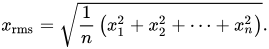

In [14]:
loss = tf.reduce_mean(tf.square((y_pred - y_actual)))

# Creating Training step using Gradient Descent Optimizer
* `training_step` : choosing an optimizer with learning rate and directing it to minimize  loss function

In [15]:
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Training 
A tensorflow session is created and opened. All the variables are initialized in line 2. The training is run with help of for loop created in line 4 and training_step is run in line 5
* `feed_dict` : this dictionary feed the input values to the placeholder tensors in graph
>Note: In python script we would be using is normal session (Not interactive) whereas, in jupyter since the code is split into two below blocks, we would be using an interactive session

In [16]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(epochs):
    sess.run(training_step,feed_dict= {X_tf:X_train,y_actual:y_train})

# Predicting the Results 
By having the values of slope and intercept tensors of linear regression model we are trying to predict the values of test data. Y_pred variable contains all the predicted y-values of the test x-values. 
Line 2 is closing the session.

In [17]:
y_predicted = sess.run(y_pred,feed_dict= {X_tf:X_test})
sess.close()

# Visualizing the Results
As we have predicted the y-values for a set of x-values we are visualizing the results to check how good did our line fit for our predictions.
The plot shows the red points are the data points are actual values where the blue line is the predictions.

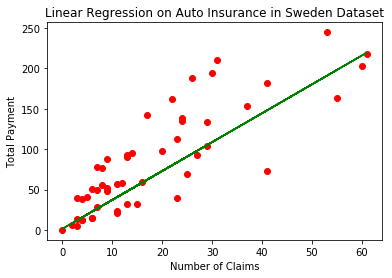

In [18]:
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_predicted,c='green')
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()